# Produce a world market research with Python

## <i>Exploration and data cleaning</i>

My mission here for <i>La Poule qui chante</i> is to analyze the global chicken market to help them choose their direction for international development.

All data have been sourced from www.fao.org for the year 2017.

In this part, we will start by determining the relevant indicators for our mission and prepare the data for the rest of the analysis.

 <br></br>
 
<u> Summary</u> :

 Tools [(here)](#another_cell_0)

 I. Explore and clean <a href="https://github.com/donia-nefiz/..." target="_blank">world market research data</a>
     <br>*1. [customers.csv](http://localhost:8888/edit/customers.csv) : exploration and data cleaning [(here)](#another_cell_a)*</br>
     <br>*2. [products.csv](http://localhost:8888/edit/products.csv) : exploration and data cleaning [(here)](#another_cell_b)*</br>
     <br>*3. [transactions.csv](http://localhost:8888/edit/transactions.csv) : exploration and data cleaning [(here)](#another_cell_c)</br>*
     <br>*4. Merge Lapage dataframes, explore and clean [(here)](#another_cell_d)</br>*
     
 Conclusion (part 1) [(here)](#another_cell_e)
     

 <a id='another_cell_0'></a>

### Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings

In [2]:
#Check null values function :
def check_nan(data, column):
    if len(data[data[column].isnull()]) == 0:
        print ("The column", column, "does not contain any missing values")
    else :
        print("The column", column, "contain ", len(data[data[column].isnull()]), " missing values")

In [3]:
#Check duplicates function :
def check_duplicates(data, column):
    n = len(data.index)
    if len(data[column].drop_duplicates()) == n :
        print ("The column", column, "does not contain duplicates")
    else :
        print("The column", column, "contains ", len(data[data[column].duplicated()]), " duplicates.")
        return data[data[column].duplicated()]

## I. World market research data, files exploration and data cleaning

### A. Worldwilde chicken consumption and sale (2017)

<a id='another_cell_a'></a>

#### 1. [chicken_consum.csv](http://localhost:8888/edit/chicken_consum_2017.csv) : exploration and data cleaning

- Loading file:

In [4]:
chicken_consum = pd.read_csv('chicken_consum_2017.csv', sep=';')

- First 5 rows display :

In [5]:
chicken_consum.head()

,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Année,Unité,Valeur
0,2,Afghanistan,5142,Nourriture,2734,Viande de Volailles,2017,Milliers de tonnes,55
1,202,Afrique du Sud,5142,Nourriture,2734,Viande de Volailles,2017,Milliers de tonnes,2035
2,3,Albanie,5142,Nourriture,2734,Viande de Volailles,2017,Milliers de tonnes,47
3,4,Algérie,5142,Nourriture,2734,Viande de Volailles,2017,Milliers de tonnes,264
4,79,Allemagne,5142,Nourriture,2734,Viande de Volailles,2017,Milliers de tonnes,1609


- Number of rows and columns :

In [6]:
chicken_consum.shape

(170, 9)

- .info display :

In [7]:
chicken_consum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code zone     170 non-null    int64 
 1   Zone          170 non-null    object
 2   Code Élément  170 non-null    int64 
 3   Élément       170 non-null    object
 4   Code Produit  170 non-null    int64 
 5   Produit       170 non-null    object
 6   Année         170 non-null    int64 
 7   Unité         170 non-null    object
 8   Valeur        170 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 12.1+ KB


- Check null and duplicates values :

In [8]:
check_nan(chicken_consum, "Code zone")
check_duplicates(chicken_consum, "Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken consumption data give information on the chicken consumption of every country in the world : their zone code (primary key), the name of zone and the value of chicken consumption (in thousands of tons)</br></li>
<li> There are 170 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Values conversion (from thousands of tons to tons) :

In [9]:
chicken_consum['Valeur'] = chicken_consum['Valeur'] * 1000
chicken_consum.rename(columns={"Valeur":"Consommation de poulet (en tonnes)"}, inplace=True)

- Removed some unnecessary columns :

In [10]:
chicken_consum.drop(columns =['Code Élément', 'Élément', 'Code Produit', 'Produit', 'Année', 'Unité'], inplace=True)
chicken_consum.head()

,Code zone,Zone,Consommation de poulet (en tonnes)
0,2,Afghanistan,55000
1,202,Afrique du Sud,2035000
2,3,Albanie,47000
3,4,Algérie,264000
4,79,Allemagne,1609000


- Outliers on the variable "Consommation de poulet" : 

---------------------------------------------------------------------------------------------------- 



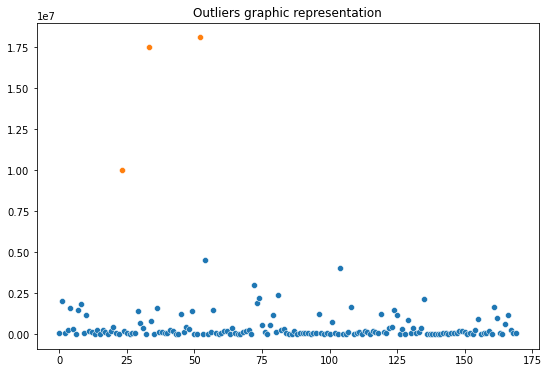

---------------------------------------------------------------------------------------------------- 



,Code zone,Zone,Consommation de poulet (en tonnes),zscore
52,231,États-Unis d'Amérique,18100000,8.164090
33,41,"Chine, continentale",17518000,7.891688
23,21,Brésil,9982000,4.364499


In [11]:
outliers = chicken_consum.copy()
outliers["zscore"] = (outliers["Consommation de poulet (en tonnes)"] - outliers["Consommation de poulet (en tonnes)"].mean())/outliers["Consommation de poulet (en tonnes)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Consommation de poulet (en tonnes)"].index, y=the_ok["Consommation de poulet (en tonnes)"].values,)
sns.scatterplot(x=the_outliers["Consommation de poulet (en tonnes)"].index, y=the_outliers["Consommation de poulet (en tonnes)"].values)
plt.title('Outliers graphic representation');
plt.savefig("Part1.Outliers graphic representation on the chicken consumption.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 3</br></li>
<i><li> The biggest consumers of chicken in the world are : the USA, China and Brazil</li>
</i></div>

 <a id='another_cell_b'></a>


#### 2. [chicken_avail.csv](http://localhost:8888/edit/chicken_avail_2017.csv) : exploration and data cleaning

- Loading file:

In [12]:
chicken_avail = pd.read_csv('chicken_avail_2017.csv', sep=';')

- First 5 rows display :

In [13]:
chicken_avail.head()

,Code zone,Zone,Code Élément,Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,5301,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,57
1,202,Afrique du Sud,5301,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,2118
2,3,Albanie,5301,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,47
3,4,Algérie,5301,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,277
4,79,Allemagne,5301,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,1739


- Number of rows and columns :

In [14]:
chicken_avail.shape

(170, 8)

- .info display :

In [15]:
chicken_avail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code zone     170 non-null    int64 
 1   Zone          170 non-null    object
 2   Code Élément  170 non-null    int64 
 3   Élément       170 non-null    object
 4   Produit       170 non-null    object
 5   Année         170 non-null    int64 
 6   Unité         170 non-null    object
 7   Valeur        170 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 10.8+ KB


- Check missing and duplicate values :

In [16]:
check_nan(chicken_avail, "Code zone")
check_duplicates(chicken_avail,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken availibility data give information on the chicken availibility of every country in the world : their zone code (primary key), the name of zone and the value of chicken availibility (in thousands of tons)</br></li>
<li> There are 170 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Values conversion (from thousands of tons to tons) :

In [17]:
chicken_avail['Valeur'] = chicken_avail['Valeur'] * 1000
chicken_avail.rename(columns={"Valeur":"Disponibilité de poulet (en tonnes)"}, inplace=True)

- Removed some unnecessary columns :

In [18]:
chicken_avail.drop(columns =['Zone', 'Code Élément', 'Élément', 'Produit', 'Année', 'Unité'], inplace=True)
chicken_avail.head()

,Code zone,Disponibilité de poulet (en tonnes)
0,2,57000
1,202,2118000
2,3,47000
3,4,277000
4,79,1739000


- Outliers on the variable "Disponibilité de poulet" : 

---------------------------------------------------------------------------------------------------- 



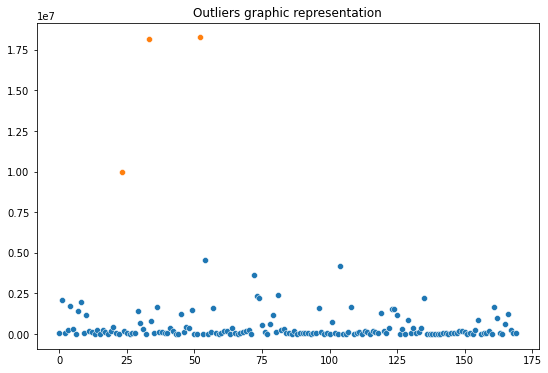

---------------------------------------------------------------------------------------------------- 



,Code zone,Disponibilité de poulet (en tonnes),zscore
52,231,18266000,8.037001
33,41,18161000,7.988994
23,21,9982000,4.249484


In [19]:
outliers = chicken_avail.copy()
outliers["zscore"] = (outliers["Disponibilité de poulet (en tonnes)"] - outliers["Disponibilité de poulet (en tonnes)"].mean())/outliers["Disponibilité de poulet (en tonnes)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Disponibilité de poulet (en tonnes)"].index, y=the_ok["Disponibilité de poulet (en tonnes)"].values,)
sns.scatterplot(x=the_outliers["Disponibilité de poulet (en tonnes)"].index, y=the_outliers["Disponibilité de poulet (en tonnes)"].values)
plt.title('Outliers graphic representation');
plt.savefig("Part1.Outliers graphic representation on chicken availibility.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 3</br></li>
<i><li> The biggest availibility of chicken in the world are in : the USA, China and Brazil</li>
</i></div>

  <a id='another_cell_c'></a>

#### 3. [chicken_avail_per_hab.csv](http://localhost:8888/edit/chicken_avail_per_hab_2017.csv) : exploration and data cleaning


- Loading file:

In [20]:
chicken_avail_per_hab = pd.read_csv('chicken_avail_per_hab_2017.csv', sep=';')

- First 5 rows display :

In [21]:
chicken_avail_per_hab.head()

,Code zone,Zone,Code Élément,Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,1.53
1,202,Afrique du Sud,645,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,35.69
2,3,Albanie,645,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,16.36
3,4,Algérie,645,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,6.38
4,79,Allemagne,645,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,19.47


- Number of rows and columns :

In [22]:
chicken_avail_per_hab.shape

(172, 8)

- .info display :

In [23]:
chicken_avail_per_hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code zone     172 non-null    int64  
 1   Zone          172 non-null    object 
 2   Code Élément  172 non-null    int64  
 3   Élément       172 non-null    object 
 4   Produit       172 non-null    object 
 5   Année         172 non-null    int64  
 6   Unité         172 non-null    object 
 7   Valeur        172 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 10.9+ KB


- Check missing and duplicate values :

In [24]:
check_nan(chicken_avail_per_hab, "Code zone")
check_duplicates(chicken_avail_per_hab,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken availibility per habitant data give information on the chicken average availibility per habitant of every country in the world : their zone code (primary key), the name of zone and the value of chicken average availibility per habitant (in kg)</br></li>
<li> There are 172 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Rename the last column :

In [25]:
chicken_avail_per_hab.rename(columns={"Valeur":"Disponibilité alimentaire moyenne par habitant (en tonnes)"}, inplace=True)

- Removed some unnecessary columns :

In [26]:
chicken_avail_per_hab.drop(columns =['Zone', 'Code Élément', 'Élément', 'Produit', 'Année', 'Unité'], inplace=True)
chicken_avail_per_hab.head()

,Code zone,Disponibilité alimentaire moyenne par habitant (en tonnes)
0,2,1.53
1,202,35.69
2,3,16.36
3,4,6.38
4,79,19.47


- Outliers on the variable "Disponibilité alimentaire moyenne par habitant" :

---------------------------------------------------------------------------------------------------- 



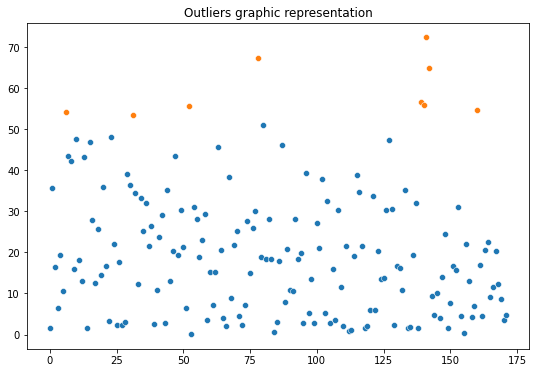

---------------------------------------------------------------------------------------------------- 



,Code zone,Disponibilité alimentaire moyenne par habitant (en tonnes),zscore
141,191,72.31,3.284717
78,105,67.39,2.974508
142,244,64.77,2.809316
139,189,56.69,2.299868
140,188,55.77,2.241862
52,231,55.68,2.236187
160,220,54.54,2.164310
6,8,54.10,2.136568
31,96,53.51,2.099368


In [27]:
outliers = chicken_avail_per_hab.copy()
outliers["zscore"] = (outliers["Disponibilité alimentaire moyenne par habitant (en tonnes)"] - outliers["Disponibilité alimentaire moyenne par habitant (en tonnes)"].mean())/outliers["Disponibilité alimentaire moyenne par habitant (en tonnes)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Disponibilité alimentaire moyenne par habitant (en tonnes)"].index, y=the_ok["Disponibilité alimentaire moyenne par habitant (en tonnes)"].values,)
sns.scatterplot(x=the_outliers["Disponibilité alimentaire moyenne par habitant (en tonnes)"].index, y=the_outliers["Disponibilité alimentaire moyenne par habitant (en tonnes)"].values)
plt.title('Outliers graphic representation');
plt.savefig("Part1.Outliers graphic representation on chicken availibility per habitant.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

In [28]:
print("Numbers of outliers detected :", len(the_outliers))

Numbers of outliers detected : 9


<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 9</br></li>
<i><li> The countries concerned are moslty islands, Israel, USA and China</li>
</i></div>

#### 4. [chicken_prod.csv](http://localhost:8888/edit/chicken_prod_2017.csv) : exploration and data cleaning

- Loading file:

In [31]:
chicken_prod = pd.read_csv('chicken_prod_2017.csv', sep=';')

- First 5 rows display :

In [32]:
chicken_prod.head()

,Code zone,Zone,Code Élément,Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,5511,Production,Viande de Volailles,2017,Milliers de tonnes,28
1,202,Afrique du Sud,5511,Production,Viande de Volailles,2017,Milliers de tonnes,1667
2,3,Albanie,5511,Production,Viande de Volailles,2017,Milliers de tonnes,13
3,4,Algérie,5511,Production,Viande de Volailles,2017,Milliers de tonnes,275
4,79,Allemagne,5511,Production,Viande de Volailles,2017,Milliers de tonnes,1514


- Number of rows and columns :

In [33]:
chicken_prod.shape

(168, 8)

- .info display :

In [34]:
chicken_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code zone     168 non-null    int64 
 1   Zone          168 non-null    object
 2   Code Élément  168 non-null    int64 
 3   Élément       168 non-null    object
 4   Produit       168 non-null    object
 5   Année         168 non-null    int64 
 6   Unité         168 non-null    object
 7   Valeur        168 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 10.6+ KB


- Check missing and duplicate values :

In [35]:
check_nan(chicken_prod, "Code zone")
check_duplicates(chicken_prod,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken production data give information on the chicken production of every country in the world : their zone code (primary key), the name of zone and the value of chicken production (in thousands of tons)</br></li>
<li> There are 168 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Values conversion (from thousands of tons to tons) :

In [36]:
chicken_prod['Valeur'] = chicken_prod['Valeur'] * 1000
chicken_prod.rename(columns={"Valeur":"Production de poulet (en tonnes)"}, inplace=True)

- Removed some unnecessary columns :

In [37]:
chicken_prod.drop(columns =['Zone', 'Code Élément', 'Élément', 'Produit', 'Année', 'Unité'], inplace=True)
chicken_prod.head()

,Code zone,Production de poulet (en tonnes)
0,2,28000
1,202,1667000
2,3,13000
3,4,275000
4,79,1514000


- Outliers on the variable "Production de poulet" : 

---------------------------------------------------------------------------------------------------- 



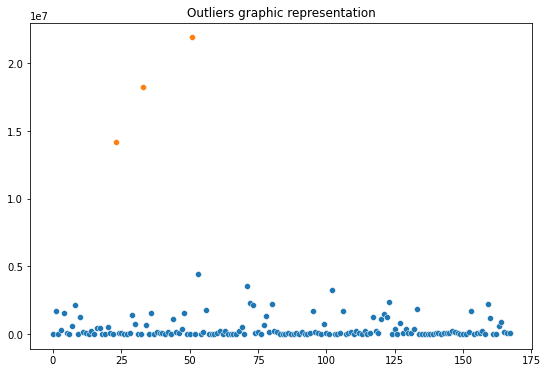

---------------------------------------------------------------------------------------------------- 



,Code zone,Production de poulet (en tonnes),zscore
51,231,21914000,8.470587
33,41,18236000,7.000244
23,21,14201000,5.387184


In [40]:
outliers = chicken_prod.copy()
outliers["zscore"] = (outliers["Production de poulet (en tonnes)"] - outliers["Production de poulet (en tonnes)"].mean())/outliers["Production de poulet (en tonnes)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Production de poulet (en tonnes)"].index, y=the_ok["Production de poulet (en tonnes)"].values,)
sns.scatterplot(x=the_outliers["Production de poulet (en tonnes)"].index, y=the_outliers["Production de poulet (en tonnes)"].values)
plt.title('Outliers graphic representation');
plt.savefig("Part1.Outliers graphic representation on chicken production.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 3</br></li>
<i><li> The biggest production of chicken in the world are in : the USA, China and Brazil</li>
</i></div>

#### 5. [chicken_export.csv](http://localhost:8888/edit/chicken_export_2017.csv) : exploration and data cleaning

- Loading file:

In [41]:
chicken_export = pd.read_csv('chicken_export_2017.csv', sep=';')

- First 5 rows display :

In [42]:
chicken_export.head()

,Code zone,Zone,Code Élément,Élément,Produit,Année,Unité,Valeur
0,202,Afrique du Sud,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,63
1,3,Albanie,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,0
2,4,Algérie,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,0
3,79,Allemagne,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,646
4,7,Angola,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,0


- Number of rows and columns :

In [45]:
chicken_export.shape

(135, 8)

- .info display :

In [44]:
chicken_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code zone     135 non-null    int64 
 1   Zone          135 non-null    object
 2   Code Élément  135 non-null    int64 
 3   Élément       135 non-null    object
 4   Produit       135 non-null    object
 5   Année         135 non-null    int64 
 6   Unité         135 non-null    object
 7   Valeur        135 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 8.6+ KB


- Check missing and duplicate values :

In [46]:
check_nan(chicken_export, "Code zone")
check_duplicates(chicken_export,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken exportation data give information on the chicken exportation of every country in the world : their zone code (primary key), the name of zone and the value of chicken exportation (in thousands of tons)</br></li>
<li> There are 135 country concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Values conversion (from thousands of tons to tons) :

In [47]:
chicken_export['Valeur'] = chicken_export['Valeur'] * 1000
chicken_export.rename(columns={"Valeur":"Exportation de poulet (en tonnes)"}, inplace=True)

- Outliers on the variable "Exportation de poulet" : 

---------------------------------------------------------------------------------------------------- 



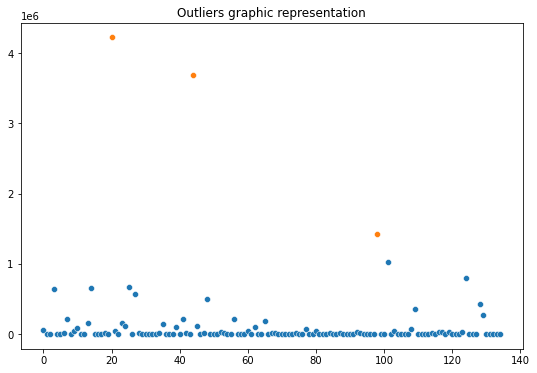

---------------------------------------------------------------------------------------------------- 



,Code zone,Zone,Code Élément,Élément,Produit,Année,Unité,Exportation de poulet (en tonnes),zscore
20,21,Brésil,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,4223000,7.962123
44,231,États-Unis d'Amérique,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,3692000,6.928615
98,150,Pays-Bas,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,1418000,2.502635


In [48]:
outliers = chicken_export.copy()
outliers["zscore"] = (outliers["Exportation de poulet (en tonnes)"] - outliers["Exportation de poulet (en tonnes)"].mean())/outliers["Exportation de poulet (en tonnes)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Exportation de poulet (en tonnes)"].index, y=the_ok["Exportation de poulet (en tonnes)"].values,)
sns.scatterplot(x=the_outliers["Exportation de poulet (en tonnes)"].index, y=the_outliers["Exportation de poulet (en tonnes)"].values)
plt.title('Outliers graphic representation');
plt.savefig("Part1.Outliers graphic representation on chicken exportation.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 3</br></li>
<i><li> The biggest exportation of chicken in the world are in : Brazil, USA and The Netherlands</li>
</i></div>

#### 6. [chicken_import.csv](http://localhost:8888/edit/chicken_import_2017.csv) : exploration and data cleaning


- Loading file:

In [50]:
chicken_import = pd.read_csv('chicken_import_2017.csv', sep=';')

- First 5 rows display :

In [51]:
chicken_import.head()

,Code zone,Zone,Code Élément,Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,5611,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,29
1,202,Afrique du Sud,5611,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,514
2,3,Albanie,5611,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,38
3,4,Algérie,5611,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,2
4,79,Allemagne,5611,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,842


- Number of rows and columns :

In [53]:
chicken_import.shape

(170, 8)

- .info display :

In [54]:
chicken_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code zone     170 non-null    int64 
 1   Zone          170 non-null    object
 2   Code Élément  170 non-null    int64 
 3   Élément       170 non-null    object
 4   Produit       170 non-null    object
 5   Année         170 non-null    int64 
 6   Unité         170 non-null    object
 7   Valeur        170 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 10.8+ KB


- Check missing and duplicate values :

In [55]:
check_nan(chicken_import, "Code zone")
check_duplicates(chicken_import,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken importation data give information on the chicken importation of every country in the world : their zone code (primary key), the name of zone and the value of chicken importation (in thousands of tons)</br></li>
<li> There are 170 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Values conversion (from thousands of tons to tons) :

In [56]:
chicken_import['Valeur'] = chicken_import['Valeur'] * 1000
chicken_import.rename(columns={"Valeur":"Importation de poulet (en tonnes)"}, inplace=True)

- Removed some unnecessary columns :

In [57]:
chicken_import.drop(columns =['Zone', 'Code Élément', 'Élément', 'Produit', 'Année', 'Unité'], inplace=True)
chicken_import.head()

,Code zone,Importation de poulet (en tonnes)
0,2,29000
1,202,514000
2,3,38000
3,4,2000
4,79,842000


- Outliers on the variable "Importation de poulet" : 

In [ ]:
outliers = chicken_import.copy()
outliers["zscore"] = (outliers["Disponibilité de poulet (en tonnes)"] - outliers["Disponibilité de poulet (en tonnes)"].mean())/outliers["Disponibilité de poulet (en tonnes)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Disponibilité de poulet (en tonnes)"].index, y=the_ok["Disponibilité de poulet (en tonnes)"].values,)
sns.scatterplot(x=the_outliers["Disponibilité de poulet (en tonnes)"].index, y=the_outliers["Disponibilité de poulet (en tonnes)"].values)
plt.title('Outliers graphic representation');
plt.savefig("Part1.Outliers graphic representation on chicken availibility.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

- BIG MERGE :

In [29]:
chickenOK = chicken_consum.merge(chicken_avail, how='left', on='Code zone').merge(chicken_avail_per_hab, how='left', on='Code zone')
display(chickenOK.head())

,Code zone,Zone,Consommation de poulet (en tonnes),Disponibilité de poulet (en tonnes),Disponibilité alimentaire moyenne par habitant (en tonnes)
0,2,Afghanistan,55000,57000,1.53
1,202,Afrique du Sud,2035000,2118000,35.69
2,3,Albanie,47000,47000,16.36
3,4,Algérie,264000,277000,6.38
4,79,Allemagne,1609000,1739000,19.47


- Add a new column "period" :

In [30]:
transactions['period'] = transactions['date'].dt.to_period("m")
transactions

NameError: name 'transactions' is not defined

- Online sales graphical representation from 2021 to 2023 :

In [ ]:
transactions["period"].value_counts().reset_index().set_index('index').sort_values("index").plot( figsize=(10,6))
plt.ylabel("Sales")
plt.title("Online sales graphical representation from 2021 to 2023");
plt.savefig("Part1.Online sales graphical representation from 2021 to 2023.png", bbox_inches='tight')

<div class="alert-danger">
    <u>Danger</u> :
<i><br><li> There is a significant drop in sales on October 2021 (to analyse later)</br></li>
</i></div>

<a id='another_cell_d'></a>

### 4. Merge Lapage dataframes, explore and clean

- Merge dataframes :

In [ ]:
lapage_df = transactions.merge(customers, how='left', on='client_id').merge(products, how='left', on='id_prod')
display(lapage_df.head())

- Explore the final result :

In [ ]:
lapage_df.shape

In [ ]:
lapage_df.info()

<div class="alert-danger">
    <u>Danger</u> :
<i><br><li> Columns "price" and "categ" have missing values</br></li>
</i></div>

In [ ]:
check_nan(lapage_df, "price")
check_nan(lapage_df, "categ")

- Check mask values :

In [ ]:
mask_nan = (lapage_df['price'].isnull()) | (lapage_df['categ'].isnull())
print("Missing values concern those products :", lapage_df[mask_nan]["id_prod"].unique())

- Check id_prod '0_2245' in products df :

In [ ]:
products[products["id_prod"]=="0_2245" ]

<div class="alert-danger">
    <u>Danger</u> :
<i><br><li> The product '0_2245' is not listed in products df</br></li>
<li> The product '0_2245' was saled 221 times</li>
<li> The product '0_2245' starts with 0_xxxx, so it belongs to the category 0</li>
<li> We must keep this product in the final result and assign it an average price: the category 0's one</li>
</i></div>

- Clean the final result : 

In [ ]:
categ_0_mean = round(lapage_df[lapage_df["categ"]==0]["price"].mean(),2)#categ 0 average price

lapage_df.loc[lapage_df["id_prod"]=="0_2245", "price"] = categ_0_mean#categ 0 average price inputation

lapage_df.loc[lapage_df["id_prod"]=="0_2245", "categ"] = 0#categ 0 inputation on categ

lapage_df[lapage_df["id_prod"]=="0_2245"].head()#final chek

In [ ]:
lapage_df.info()

<a id='another_cell_e'></a>

### Conclusion (part 1)

<div class="alert-success">
There are 679,332 transactions in the final dataframe :
<br><i>→ The test product T_0 has been deleted (200 lines)</i></br>
<i><br>→ The missing price of product 0_2245 has been updated by the category 0's products average price (221 lines)</br></i>
<i><br>→ 157 outliers have been detected on price</i></br>
</i></div>

In [ ]:
lapage_df

In [ ]:
lapage_df.to_csv("export_lapage_df.csv", sep=';')